In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix


# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/email.csv")

In [ ]:
df.info()
df = df.drop('Gender', axis=1)
df = df.drop('IsSpam', axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
 2   IsSpam    5573 non-null   bool  
 3   Gender    5573 non-null   object
dtypes: bool(1), object(3)
memory usage: 136.2+ KB


In [ ]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
X=df['Message']
Y=df['spam']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
#Naive Bayes
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [ ]:
#Fiting the algorithm
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [ ]:
#Make prediction on X_test
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [ ]:
conf_mat_NB=confusion_matrix(y_test, y_pred_NB)

<Axes: >

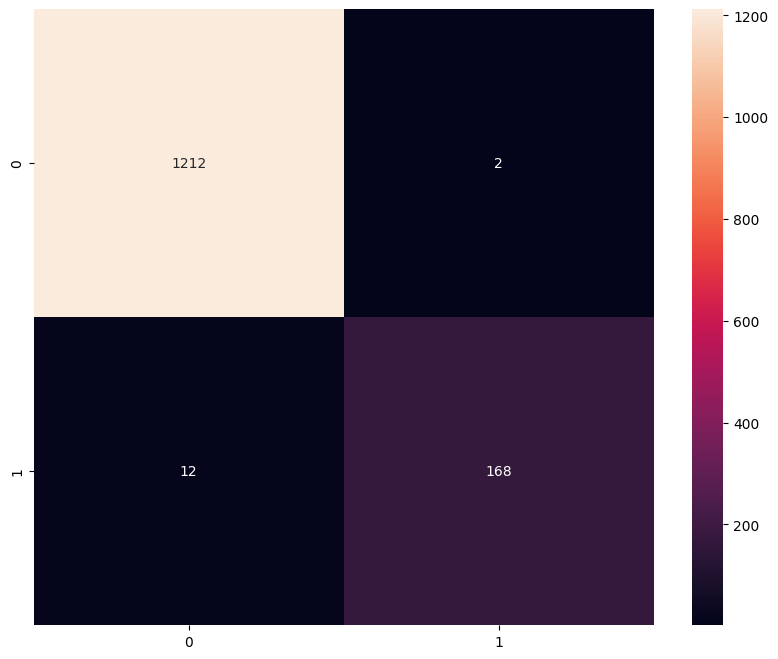

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d')

In [ ]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.9899569583931134

In [ ]:
#SVM algorithm
from sklearn import svm



In [ ]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])


In [ ]:
clf_svm.fit(X_train,y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [ ]:
y_pred_SVM=clf_svm.predict(X_test)


In [ ]:
conf_mat_SVM=confusion_matrix(y_test, y_pred_SVM)


<Axes: >

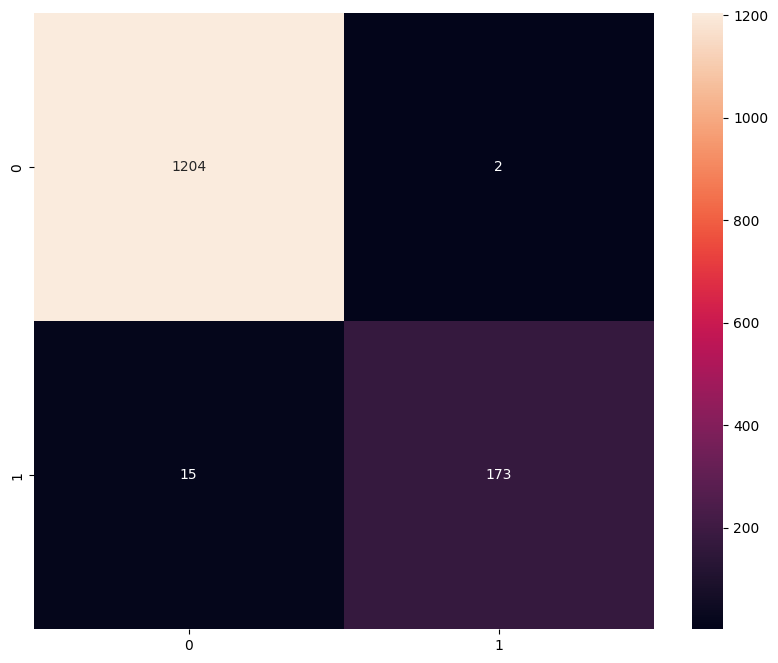

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_SVM,annot=True,fmt='d')

In [ ]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

0.9878048780487805

In [ ]:
#KNN algorithm
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [ ]:
clf_knn.fit(X_train,y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
y_pred_KNN=clf_knn.predict(X_test)

In [ ]:
conf_mat_KNN=confusion_matrix(y_test, y_pred_KNN)


<Axes: >

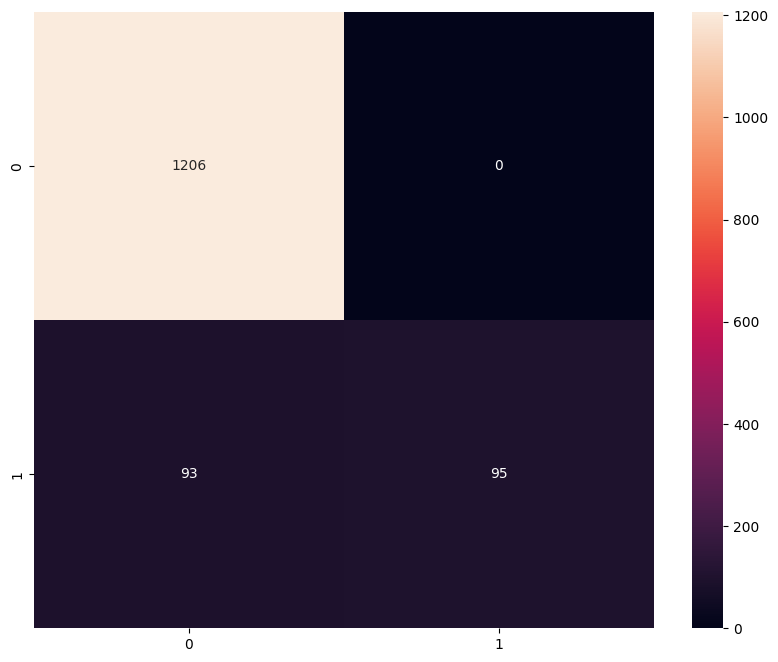

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_KNN,annot=True,fmt='d')

In [ ]:
knn_acc=accuracy_score(y_test,y_pred_KNN)
knn_acc

0.9332855093256814

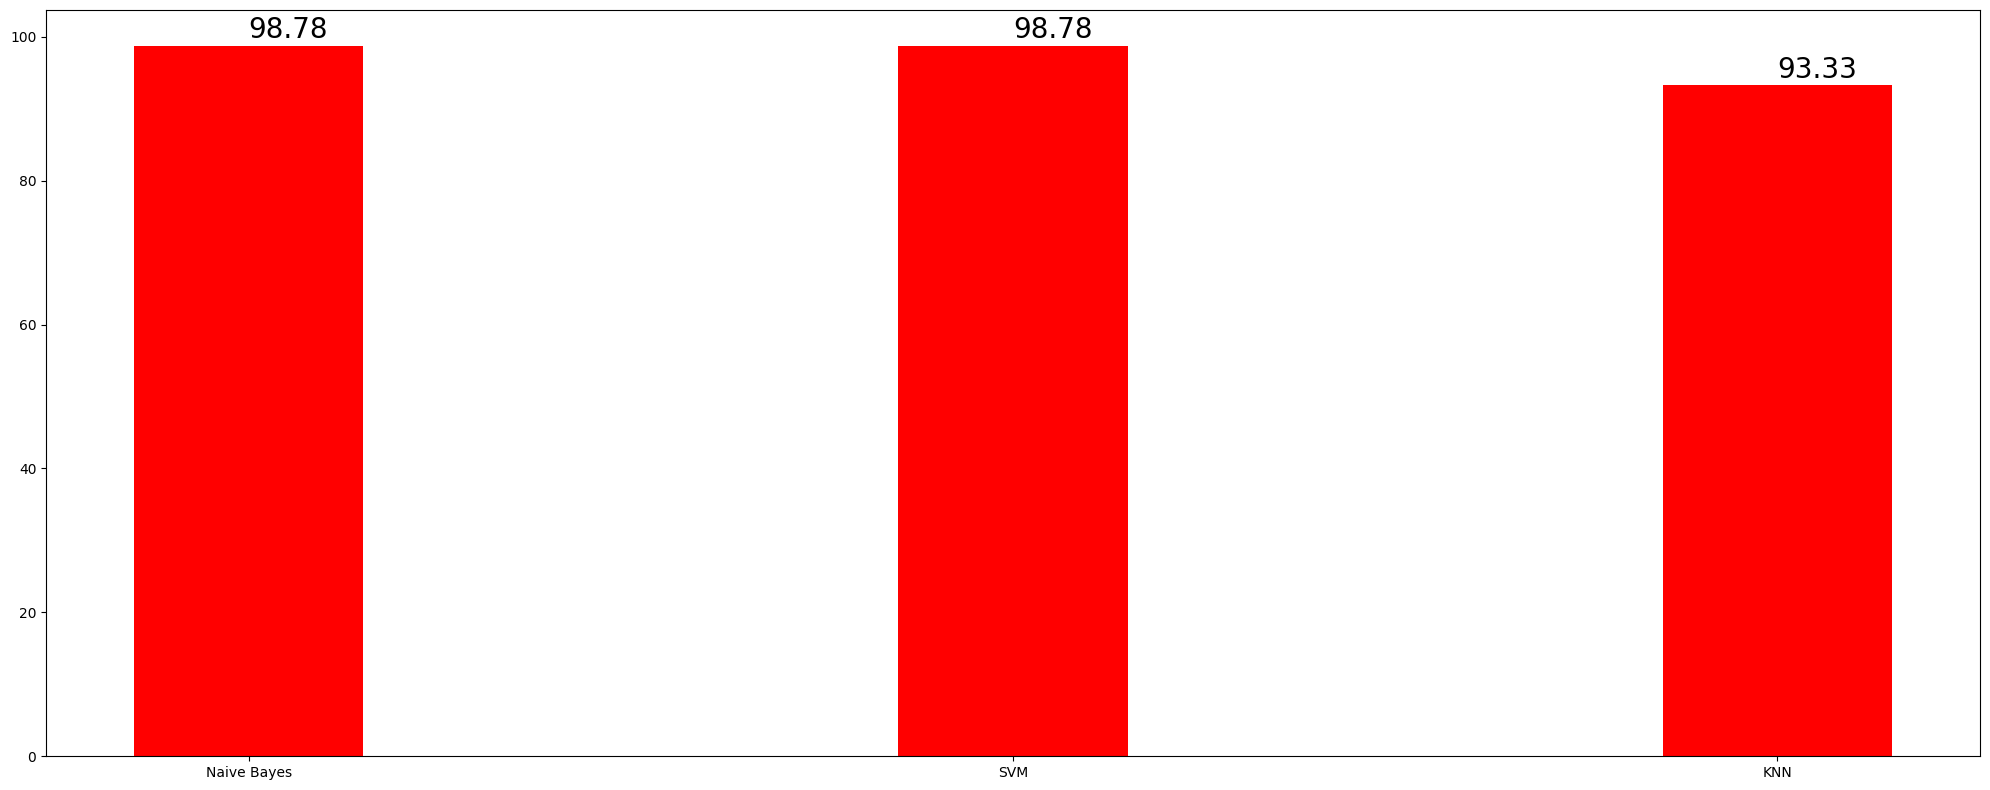

In [ ]:
menMeans = np.array([naive_acc,svm_acc,knn_acc])*100
ind = ['Naive Bayes','SVM','KNN']
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(ind,menMeans,width=0.3,color ='red')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

In [ ]:
def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print("This is a Spam email")
    else:
        print("This is a Real email")

In [ ]:
test_email_1="Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!" #Spam Email from my mail box
test_email_2="Hey Ashfak, can we get together to watch footbal game tomorrow?"   #Real Email from my mail box

In [ ]:
spam_dect(clf_NaiveBaised,test_email_1)
spam_dect(clf_NaiveBaised,test_email_2)

This is a Spam email
This is a Real email
